In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint



In [57]:
# Define the matrix for the three state Markov Model (C,I,O)
def transition_matrix(k_co, k_oc, k_oi, k_io, k_ic, k_ci):

    C = 0;
    I = 1;
    O = 2; 

    n = 3;
    A = np.zeros((n,n))

    A[C, O] = k_co;
    A[O, C] = k_oc;
    A[O, I] = k_oi;
    A[I, O] = k_io;
    A[I, C] = k_ic;
    A[C, I] = k_ci;

    # needs to do this for dy/dt = A*y to be correct:
    A = A.transpose()

    # we have only filled in the positive contributions
    # we can figure out the negative ones from those:
    for i in range(n):
        A[i,i] = -A[:,i].sum()

    return A


In [58]:
k_co, k_oc, k_oi, k_io, k_ic, k_ci = 1, 1, 1, 1, 1, 2
P = (k_co, k_oc, k_oi, k_io, k_ic, k_ci)


In [59]:
A = transition_matrix(k_co, k_oc, k_oi, k_io, k_ic, k_ci)

In [60]:
print(A)

[[-3.  1.  1.]
 [ 2. -2.  1.]
 [ 1.  1. -2.]]


In [61]:
def ode_system(y, t, k_co, k_oc, k_oi, k_io, k_ic, k_ci):

    A = transition_matrix(k_co, k_oc, k_oi, k_io, k_ic, k_ci)
    dy = np.dot(A,y)

    return dy



In [62]:
Y0 = np.array([1,0,0])

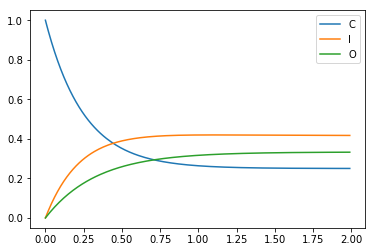

In [63]:
dt = 0.01;
t = np.arange(0,2,dt)
Y = odeint(ode_system, Y0, t, P)
plt.plot(t,Y); plt.legend(('C','I','O'))
plt.show()


In [64]:
# This function takes in state, and returns a new state
# based on the transition matrix and the time interval
def advance(state, A, dt):

    P = A[:,state]*dt; 
    P[state] = 0;
    CP = np.cumsum(P);

    random_number = np.random.rand();
    for i in range(len(CP)):

        if random_number < CP[i]:
            state = i;
            return state

    return state



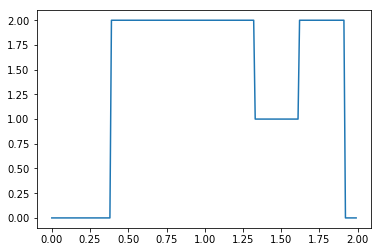

In [65]:
s = np.zeros(len(t),'i')
s[0] = 0;
for i in range(len(t)-1):
    s[i+1]  = advance(s[i], A, dt)
    
plt.plot(t,s)
plt.show()
# Try and run this several times, note the differences

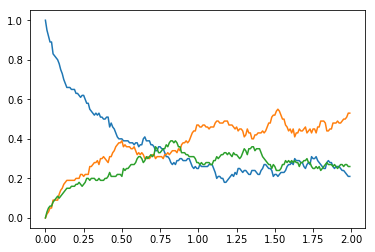

In [66]:
N = 100  # a larger value will give results closer to the deterministic solution
S = np.zeros((len(t),N),'i')
for n in range(N):
    S[0,n] = 0;
    for i in range(len(t)-1):
        S[i+1,n]  = advance(S[i,n], A, dt)
    
p0 = np.mean(S==0,1)
p1 = np.mean(S==1,1)
p2 = np.mean(S==2,1)
plt.plot(t,p0,t,p1,t,p2); plt.show()

In [67]:
# increase N
# plot the deterministc and stochastic solution in the same plot